In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = pd.read_csv("data/0_x.csv")

In [3]:
x.head()

,0.07184119218267622,0.8553524138064769,-0.3055966142959303,0.028252569993086545,1.8268953710701943
0,0.139521,-0.423507,0.461059,-0.447400,-0.034988
1,1.626311,-0.257622,-0.697520,1.413219,1.086292
2,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
3,-0.783365,-0.861232,0.951448,-0.117306,0.680597
4,3.077357,0.948615,-0.295527,1.390358,-0.116174


In [4]:
x = pd.read_csv("data/0_x.csv", header=None)
y = pd.read_csv("data/0_y.csv", header=None)

In [5]:
x.shape, y.shape

((387, 5), (387, 1))

In [38]:
from sklearn.linear_model import LinearRegression

In [7]:
binary = LinearRegression()

In [8]:
binary.fit(x[[1]], y)

LinearRegression()

In [9]:
binary.coef_

array([[95.52010745]])

In [10]:
binary.predict(x[[1]])

array([[  81.7066754 ],
       [ -40.45008468],
       [ -24.60472955],
       [ -78.92903986],
       [ -82.26167214],
       [  90.61516808],
       [   3.20559483],
       [ -27.39642608],
       [  77.03125467],
       [ -81.79074091],
       [ -57.11517633],
       [  71.55969853],
       [ -51.83704209],
       [  13.20326205],
       [ -20.052765  ],
       [ 125.1294343 ],
       [ -85.37964253],
       [ -67.97795874],
       [  62.50833807],
       [  67.06343892],
       [ -62.27425459],
       [ -80.86610767],
       [ -27.05138056],
       [ -52.78366471],
       [  35.41921651],
       [ -79.36741675],
       [  56.64287014],
       [  79.27353864],
       [ -35.49555901],
       [-221.02386024],
       [ -80.76607115],
       [ 165.15522994],
       [  32.58309404],
       [ -35.52849481],
       [ -96.01738449],
       [ -42.18812152],
       [ -48.92932082],
       [ -75.29745421],
       [  14.5207672 ],
       [  38.22303712],
       [  -5.81538928],
       [ -10.783

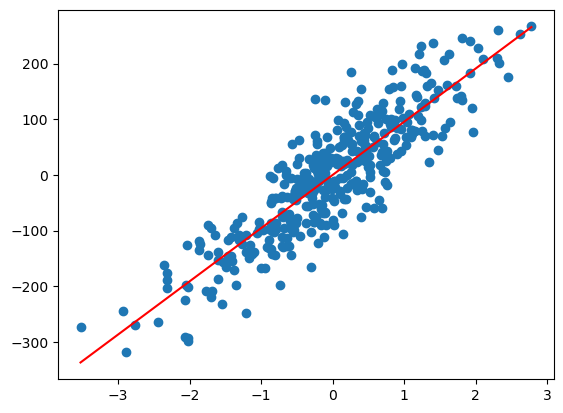

In [11]:
plt.scatter(x[1], y)
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r');

In [12]:
binary.score(x[[1]], y)

0.7699743283650629

In [13]:
multiple = LinearRegression()
multiple.fit(x, y)
multiple.score(x, y)

0.9922198026415868

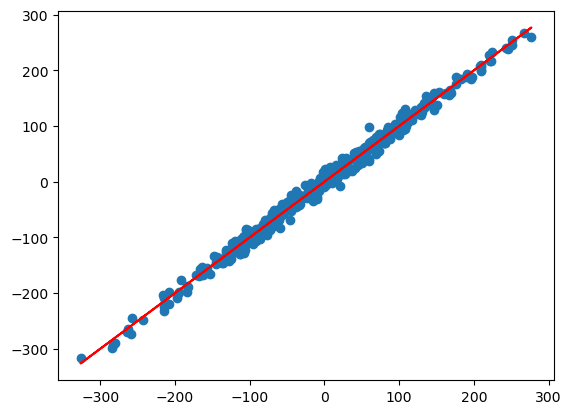

In [14]:
yy = multiple.predict(x)
plt.scatter(yy, y)
plt.plot(yy, yy, c='r')

# Множественная линейная регрессия на чистых данных

1. Сравните коэффициенты парной и множественной регрессии до и после обучения.

где я вам возьму их до обучения?

2. Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.

In [28]:
def lin_reg(X, Y):
    reg = LinearRegression()
    reg.fit(X, Y)
    
    print('R2_score = ', reg.score(X, Y), f'Точность {binary.score(X, Y)}' )
    
    plt.scatter(X, Y)
    xx = np.linspace(X.min(), X.max(), 100).reshape((-1, 1))
    plt.plot(xx, reg.predict(xx), c='r')

In [29]:
x.head()

,0,1,2,3,4
0,0.071841,0.855352,-0.305597,0.028253,1.826895
1,0.139521,-0.423507,0.461059,-0.447400,-0.034988
2,1.626311,-0.257622,-0.697520,1.413219,1.086292
3,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
4,-0.783365,-0.861232,0.951448,-0.117306,0.680597


R2_score =  0.04364336234689348 Точность -0.40944746350605143


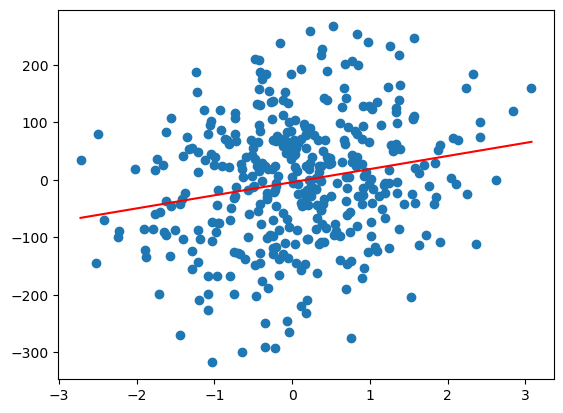

In [30]:
lin_reg(x[[0]], y)

In [21]:
binary.score(x[[0]], y)

-0.40944746350605143

R2_score =  0.7699743283650629 Точность 0.7699743283650629


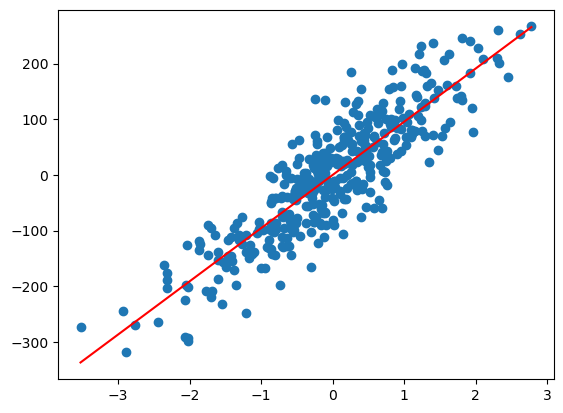

In [31]:
lin_reg(x[[1]], y)

In [22]:
binary.score(x[[1]], y)

0.7699743283650629

R2_score =  0.18794528514998887 Точность -0.01702062777204638


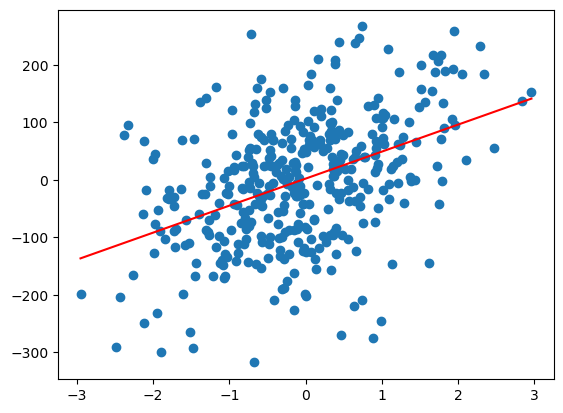

In [32]:
lin_reg(x[[2]], y)

In [24]:
binary.score(x[[2]], y)

-0.01702062777204638

R2_score =  0.047470345664983093 Точность -0.37850937704067356


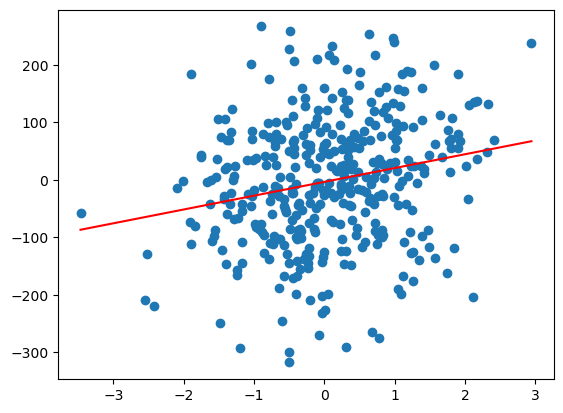

In [33]:
lin_reg(x[[3]], y)

In [25]:
binary.score(x[[3]], y)

-0.37850937704067356

R2_score =  0.00017176151145947838 Точность -0.6893964852006123


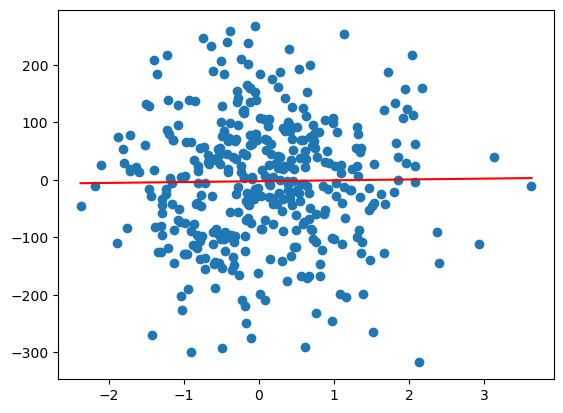

In [34]:
lin_reg(x[[4]], y)

In [27]:
binary.score(x[[4]], y)

-0.6893964852006123

3. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

In [39]:
from sklearn.preprocessing import PolynomialFeatures

In [46]:
def pol_reg_2(X, Y):
    reg = PolynomialFeatures(degree=2) 
    X_pol = reg.fit_transform(X)
    lr = LinearRegression()
    lr.fit(X_pol, Y)
    
    return lr.score(X_pol, Y)
    
def pol_reg_3(X, Y):
    reg = PolynomialFeatures(degree=3) 
    X_pol = reg.fit_transform(X)
    lr = LinearRegression()
    lr.fit(X_pol, Y)
    
    return lr.score(X_pol, Y)
    
def pol_reg_10(X, Y):
    reg = PolynomialFeatures(degree=10) 
    X_pol = reg.fit_transform(X)
    lr = LinearRegression()
    lr.fit(X_pol, Y)
    
    return lr.score(X_pol, Y)

In [47]:
print('R2_score для 0 признака:')
print(f'Полином 2 степени: {pol_reg_2(x[[0]], y)} \nПолином 3 степени: {pol_reg_3(x[[0]], y)} \nПолином 10 степени: {pol_reg_10(x[[0]], y)}');

R2_score для 0 признака:
Полином 2 степени: 0.04367170367915485 
Полином 3 степени: 0.04376506816920167 
Полином 10 степени: 0.05035596325168745


In [89]:
print('R2_score для 1 признака:')
print(f'Полином 2 степени: {pol_reg_2(x[[1]], y)} \nПолином 3 степени: {pol_reg_3(x[[1]], y)} \nПолином 10 степени: {pol_reg_10(x[[1]], y)}');

R2_score для 1 признака:
Полином 2 степени: 0.7699942588883133 
Полином 3 степени: 0.7711184109235 
Полином 10 степени: 0.7726769307411921


In [90]:
print('R2_score для 2 признака:')
print(f'Полином 2 степени: {pol_reg_2(x[[2]], y)} \nПолином 3 степени: {pol_reg_3(x[[2]], y)} \nПолином 10 степени: {pol_reg_10(x[[2]], y)}');

R2_score для 2 признака:
Полином 2 степени: 0.19000787278473807 
Полином 3 степени: 0.19280163734543854 
Полином 10 степени: 0.20440944561264418


In [91]:
print('R2_score для 3 признака:')
print(f'Полином 2 степени: {pol_reg_2(x[[3]], y)} \nПолином 3 степени: {pol_reg_3(x[[3]], y)} \nПолином 10 степени: {pol_reg_10(x[[3]], y)}');

R2_score для 3 признака:
Полином 2 степени: 0.04794250960519941 
Полином 3 степени: 0.05031163217811918 
Полином 10 степени: 0.07266746559268988


In [92]:
print('R2_score для 4 признака:')
print(f'Полином 2 степени: {pol_reg_2(x[[4]], y)} \nПолином 3 степени: {pol_reg_3(x[[4]], y)} \nПолином 10 степени: {pol_reg_10(x[[4]], y)}');

R2_score для 4 признака:
Полином 2 степени: 0.0010490365524417067 
Полином 3 степени: 0.0010646025332345932 
Полином 10 степени: 0.04505264171346801


Регрессия наиболее значима при степени полинома = 10 для всех признаков

4. Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.

In [108]:
def lin_reg(X, Y):
    reg = LinearRegression()
    reg.fit(X, Y)
    
    return reg.score(X, Y)

In [112]:
table = pd.DataFrame({'Признак': [0, 1, 2, 3, 4], 'Линейная регрессия': [lin_reg(x[[0]], y), lin_reg(x[[1]], y), lin_reg(x[[2]], y), lin_reg(x[[3]], y), lin_reg(x[[4]], y)], 'Полиномиальная регрессия 2': [pol_reg_2(x[[0]], y), pol_reg_2(x[[1]], y), pol_reg_2(x[[2]], y), pol_reg_2(x[[3]], y), pol_reg_2(x[[4]], y)], 'Полиномиальная регрессия 3': [pol_reg_3(x[[0]], y), pol_reg_3(x[[1]], y), pol_reg_3(x[[2]], y), pol_reg_3(x[[3]], y), pol_reg_3(x[[4]], y)], 'Полиномиальная регрессия 10': [pol_reg_10(x[[0]], y), pol_reg_10(x[[1]], y), pol_reg_10(x[[2]], y), pol_reg_10(x[[3]], y), pol_reg_10(x[[4]], y)]})
table

,Признак,Линейная регрессия,Полиномиальная регрессия 2,Полиномиальная регрессия 3,Полиномиальная регрессия 10
0,0,0.043643,0.043672,0.043765,0.050356
1,1,0.769974,0.769994,0.771118,0.772677
2,2,0.187945,0.190008,0.192802,0.204409
3,3,0.047470,0.047943,0.050312,0.072667
4,4,0.000172,0.001049,0.001065,0.045053


5. Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.

In [48]:
'''Функции для регрессий'''
def linear_predict(X, Y):
    reg = LinearRegression()
    reg.fit(X, Y)
    return reg.predict(X)

def poly_predict(X, Y):
    reg = PolynomialFeatures(degree=10) 
    X_pol = reg.fit_transform(X)
    lr = LinearRegression()
    lr.fit(X_pol, Y)
    return lr.predict(X_pol)

'''Функции для рассчета метрик качетсва'''
def tss(X, Y):
    TSS = ((Y - Y.mean())**2).sum()[0]
    return TSS

def ess(X, Y, func_reg):
    ESS = ((Y - func_reg(X, Y))**2).sum()[0]
    return ESS

def rss(X, Y, func_reg):
    RSS = ((func_reg(X, Y) - Y.mean()[0])**2).sum()
    return RSS

In [49]:
TSS = [tss(x[[0]], y), tss(x[[1]], y), tss(x[[2]], y), tss(x[[3]], y), tss(x[[4]], y)]
ESS = [ess(x[[0]], y, linear_predict), ess(x[[1]], y, linear_predict), ess(x[[2]], y, linear_predict), ess(x[[3]], y, linear_predict), ess(x[[4]], y, linear_predict)]
RSS = [rss(x[[0]], y, linear_predict), rss(x[[1]], y, linear_predict), rss(x[[2]], y, linear_predict), rss(x[[3]], y, linear_predict), rss(x[[4]], y, linear_predict)]


'''Таблица для линейной регрессии'''
table_lin = pd.DataFrame(data={'TSS': TSS, 'ESS': ESS, 'RSS': RSS})
table_lin

,TSS,ESS,RSS
0,4.650463e+06,4.447501e+06,2.029618e+05
1,4.650463e+06,1.069726e+06,3.580737e+06
2,4.650463e+06,3.776430e+06,8.740325e+05
3,4.650463e+06,4.429703e+06,2.207591e+05
4,4.650463e+06,4.649664e+06,7.987705e+02


In [50]:
TSS = [tss(x[[0]], y), tss(x[[1]], y), tss(x[[2]], y), tss(x[[3]], y), tss(x[[4]], y)]
ESS = [ess(x[[0]], y, poly_predict), ess(x[[1]], y, poly_predict), ess(x[[2]], y, poly_predict), ess(x[[3]], y, poly_predict), ess(x[[4]], y, poly_predict)]
RSS = [rss(x[[0]], y, poly_predict), rss(x[[1]], y, poly_predict), rss(x[[2]], y, poly_predict), rss(x[[3]], y, poly_predict), rss(x[[4]], y, poly_predict)]


'''Таблица для полиномиальной регрессии'''
table_pol = pd.DataFrame(data={'TSS': TSS, 'ESS': ESS, 'RSS': RSS})
table_pol

,TSS,ESS,RSS
0,4.650463e+06,4.416284e+06,2.341785e+05
1,4.650463e+06,1.057157e+06,3.593305e+06
2,4.650463e+06,3.699864e+06,9.505985e+05
3,4.650463e+06,4.312525e+06,3.379373e+05
4,4.650463e+06,4.440947e+06,2.095156e+05


6. (*) Замерьте время обучения полиномиальных моделей с разной степенью полинома. Сделайте вывод.

In [176]:
def poly_model(X, Y, degree_pol):
    reg = PolynomialFeatures(degree=degree_pol) 
    X_pol = reg.fit_transform(X)
    lr = LinearRegression()
    lr.fit(X_pol, Y)

In [178]:
for degree in range(1, 11):
    print('Степень: ', degree)
    %timeit poly_model(x[[0]], y, degree)

Степень:  1
5.08 ms ± 379 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Степень:  2
4.88 ms ± 102 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Степень:  3
4.92 ms ± 175 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Степень:  4
4.81 ms ± 161 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Степень:  5
4.78 ms ± 118 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Степень:  6
4.81 ms ± 113 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Степень:  7
4.94 ms ± 126 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Степень:  8
5.11 ms ± 255 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Степень:  9
4.92 ms ± 65.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Степень:  10
4.95 ms ± 106 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Сначала время уменьшалось при увеличении степени полинома, дойдя до степени=5, было зафиксированно минимальное сремя, далее время увеличиволось.